In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.VAE.VAE import *
from NN_library.VAE.train_VAE import *
%load_ext autoreload
%autoreload 2

Using device: cuda


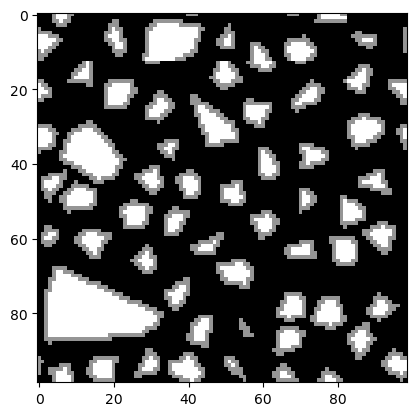

In [2]:
data = dataset_uniform()
geometry, _, _, _, _ = data.__getitem__(0)
loaders = get_loaders(data, 64)
plt.imshow(geometry[0,:,:], cmap='Greys')

$\beta$-VAE

In [8]:
args = {'lr' : 0.00001, 'epochs' : 200, 'dev' : dev, 'name' : 'NN_library/VAE/VAE'}

In [4]:
vae = VariationalAutoencoder(latent_dims = 1089)

In [5]:
total_params = sum(p.numel() for p in vae.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 30216636


In [9]:
vae = load_network(vae, args['name'], args)

In [10]:
losses_train, losses_val_r, losses_val_kl = train(vae, loaders, args, alpha=1.)

Epoch: 0 mean train loss:  120078.3774897908
mean val. rec. loss:  72432.1333333333 mean val. KL loss:  70236.1200000000
Epoch: 1 mean train loss:  121186.5436078006
mean val. rec. loss:  72315.2000000000 mean val. KL loss:  71527.5293333333
Epoch: 2 mean train loss:  122021.1492207684
mean val. rec. loss:  72271.9333333333 mean val. KL loss:  72371.8765833333
Epoch: 3 mean train loss:  122380.0151679307
mean val. rec. loss:  72197.4000000000 mean val. KL loss:  73051.6570000000
Epoch: 4 mean train loss:  122885.0291690974
mean val. rec. loss:  72155.4000000000 mean val. KL loss:  73527.1157500000
Epoch: 5 mean train loss:  123050.3310692558
mean val. rec. loss:  72215.8000000000 mean val. KL loss:  73716.5771666667
Epoch: 6 mean train loss:  123062.7134344529
mean val. rec. loss:  72109.5333333333 mean val. KL loss:  74290.1416666667
Epoch: 7 mean train loss:  123198.3081090091
mean val. rec. loss:  72109.5333333333 mean val. KL loss:  74260.3141666667
Epoch: 8 mean train loss:  12351

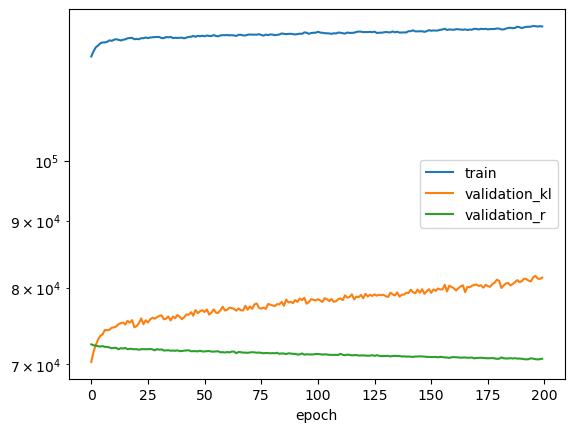

In [11]:
plt.plot(losses_train)
plt.plot(losses_val_kl)
plt.plot(losses_val_r)
plt.xlabel('epoch')
plt.legend(['train', 'validation_kl', 'validation_r'])
plt.yscale('log')

In [24]:
train_data = next(iter(loaders['train']))[0].to(args['dev'])

In [8]:
vae = vae.to(args['dev'])

In [9]:
y = vae(train_data)

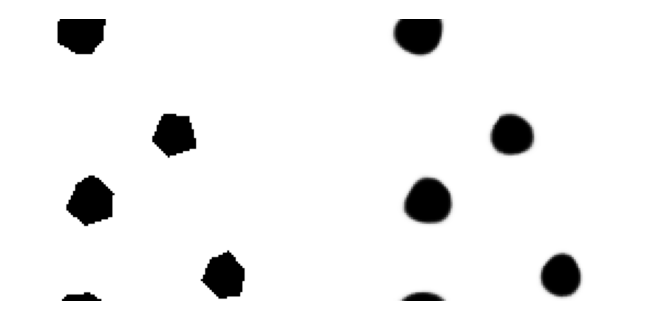

In [19]:
I = 2
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(4, 2), dpi=200)
axs.flat[0].imshow(train_data[I][0].detach().cpu().numpy(), cmap='Greys')
axs.flat[1].imshow(y[I][0].detach().cpu().numpy(), cmap='Greys')
axs.flat[0].set_axis_off()
axs.flat[1].set_axis_off()